In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('./test_images/returning to tennis after doping ban....jpg')
img.shape

(744, 992, 3)

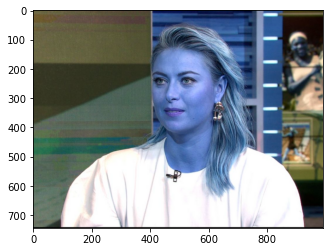

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(744, 992)

In [5]:
gray

array([[113, 113,  96, ...,  42,  43,  43],
       [ 99, 102,  88, ...,  42,  42,  43],
       [ 88,  93,  81, ...,  43,  44,  44],
       ...,
       [ 22,  24,  23, ...,  14,  14,  14],
       [  1,   3,   1, ...,   1,   1,   1],
       [  1,   3,   4, ...,   0,   0,   1]], dtype=uint8)

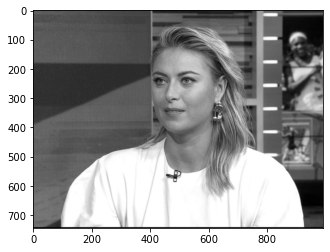

In [6]:
plt.imshow(gray,cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier('./openCV/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./openCV/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[353, 137, 265, 265]])

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(353, 137, 265, 265)

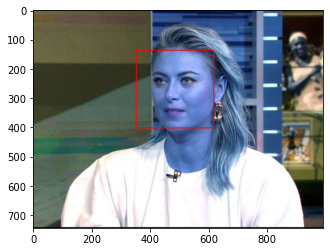

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

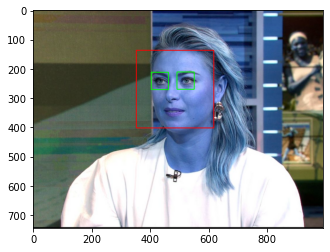

In [10]:
cv2.destroyAllWindows()
for(x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = face_img[y:y+h,x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
        
plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

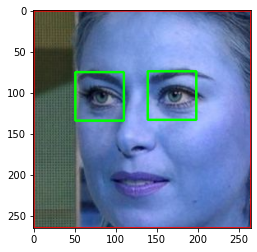

In [11]:
%matplotlib inline
plt.imshow(roi_color,cmap='gray')

In [12]:
def get_cropped_images_if_2_eyes(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = img[y:y+h,x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color

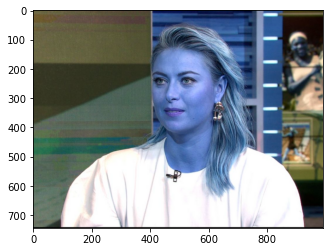

In [13]:
original_img = cv2.imread('./test_images/returning to tennis after doping ban....jpg')
plt.imshow(original_img)

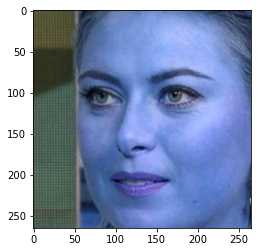

In [14]:
cropped_img = get_cropped_images_if_2_eyes('./test_images/returning to tennis after doping ban....jpg')
plt.imshow(cropped_img)

In [15]:
no_2_eyes = cv2.imread('./test_images/32 things to know about Maria....jpg')

In [16]:
cropped_no_2_eyes = get_cropped_images_if_2_eyes('./test_images/32 things to know about Maria....jpg')
cropped_no_2_eyes

In [17]:
path_to_data = "./Dataset/"
path_to_cr_data = "./Dataset/cropped/"

In [18]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    img_dirs.append(entry.path)

In [19]:
img_dirs

['./Dataset/cropped',
 './Dataset/lionel_messi',
 './Dataset/maria_sharapova',
 './Dataset/roger_federer',
 './Dataset/serena_williams',
 './Dataset/Virat_kohli']

In [20]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [21]:
cropped_img_dirs=[]
celebrity_file_names_dict={}

for img_dir in img_dirs:
    count=1
    celebrity_name=img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name]=[]
    
    for entry in os.scandir(img_dir):
        roi_color=get_cropped_images_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder=path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_img_dirs.append(cropped_folder)
                print("Generating cropped images in folder",cropped_folder)
                
            cropped_file_name=celebrity_name + str(count) + ".png"
            cropped_file_path=cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path,roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count+=1


    

cropped
lionel_messi
Generating cropped images in folder ./Dataset/cropped/lionel_messi
maria_sharapova
Generating cropped images in folder ./Dataset/cropped/maria_sharapova
roger_federer
Generating cropped images in folder ./Dataset/cropped/roger_federer
serena_williams
Generating cropped images in folder ./Dataset/cropped/serena_williams
Virat_kohli
Generating cropped images in folder ./Dataset/cropped/Virat_kohli


In [22]:
celebrity_file_names_dict = {}
for img_dir in cropped_img_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'lionel_messi': ['./Dataset/cropped/lionel_messi\\lionel_messi1.png',
  './Dataset/cropped/lionel_messi\\lionel_messi10.png',
  './Dataset/cropped/lionel_messi\\lionel_messi11.png',
  './Dataset/cropped/lionel_messi\\lionel_messi12.png',
  './Dataset/cropped/lionel_messi\\lionel_messi13.png',
  './Dataset/cropped/lionel_messi\\lionel_messi14.png',
  './Dataset/cropped/lionel_messi\\lionel_messi15.png',
  './Dataset/cropped/lionel_messi\\lionel_messi16.png',
  './Dataset/cropped/lionel_messi\\lionel_messi17.png',
  './Dataset/cropped/lionel_messi\\lionel_messi18.png',
  './Dataset/cropped/lionel_messi\\lionel_messi19.png',
  './Dataset/cropped/lionel_messi\\lionel_messi2.png',
  './Dataset/cropped/lionel_messi\\lionel_messi20.png',
  './Dataset/cropped/lionel_messi\\lionel_messi21.png',
  './Dataset/cropped/lionel_messi\\lionel_messi22.png',
  './Dataset/cropped/lionel_messi\\lionel_messi23.png',
  './Dataset/cropped/lionel_messi\\lionel_messi24.png',
  './Dataset/cropped/lionel_messi\

In [23]:
# import pywt

# def w2d(img,mode='haar',level=1):
#     imArray = img
    
#     imArray = cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    
#     imArray = np.float32(imArray)
#     imArray/=255;
    
#     coeffs = pywt.wavedec2(imArray,mode,level=level)

    
#     coeffs_H = list(coeffs)
#     coeffs_H[0]*=0;
    
#     imArray_H = pywt.waverec2(coeffs_H,mode);
#     imArray_H*=255
#     imArray_H = np.uint8(imArray_H)
    
#     return imArray

import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H
    

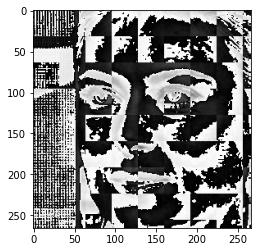

In [24]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har,cmap='gray')

In [25]:
class_dict={}
count=0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name]=count
    count=count+1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'Virat_kohli': 4}

In [26]:
X =[]
y = []
for celebrity_name , training_files in celebrity_file_names_dict.items():
    for training_image in  training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img , (32,32))
        im_har = w2d(img , 'db1',5)
        scalled_img_har = cv2.resize(im_har,(32,32))
        combined_img=np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])
        

In [27]:
len(X[0])

4096

In [28]:
X[0]

array([[59],
       [64],
       [65],
       ...,
       [ 6],
       [36],
       [11]], dtype=uint8)

In [29]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(160, 4096)

In [30]:
X[0]

array([59., 64., 65., ...,  6., 36., 11.])

In [31]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
pipe=Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel='rbf',C=10))])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.6

In [33]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.50      0.86      0.63         7
           1       0.67      0.67      0.67        12
           2       0.50      0.43      0.46         7
           3       0.50      0.29      0.36         7
           4       0.83      0.71      0.77         7

    accuracy                           0.60        40
   macro avg       0.60      0.59      0.58        40
weighted avg       0.61      0.60      0.59        40



In [34]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [35]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [36]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.733333,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.583333,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.733333,{'logisticregression__C': 1}


In [37]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [38]:
best_estimators['svm'].score(X_test,y_test)

0.6

In [39]:
best_estimators['random_forest'].score(X_test,y_test)

0.525

In [40]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.6

In [41]:
best_clf=best_estimators['logistic_regression']

In [42]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,best_clf.predict(X_test))
cm

array([[5, 0, 1, 0, 1],
       [3, 6, 2, 1, 0],
       [0, 1, 6, 0, 0],
       [0, 3, 1, 2, 1],
       [1, 0, 1, 0, 5]], dtype=int64)

Text(69.0, 0.5, 'Truth')

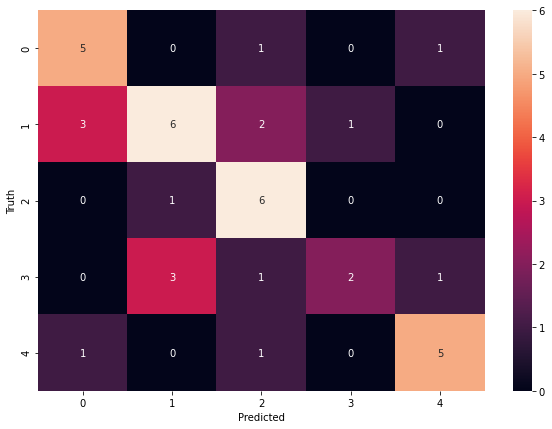

In [43]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [44]:
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'Virat_kohli': 4}

In [45]:
import joblib
joblib.dump(best_clf,'saved_model.pkl')

['saved_model.pkl']

In [46]:
import json
with open("class_dict.json","w") as f:
    f.write(json.dumps(class_dict))